<a href="https://colab.research.google.com/github/Gdearmascasta/Liberias-data/blob/main/P_PLOT_Q_QPLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Entregable punto #2 parcial de simulacion




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm



In [ ]:
df1 = pd.read_excel('tiempos_produccion.xlsx')


In [ ]:
df1

,Tiempo_Produccion (min)
0,16
1,1459
2,169
3,1957
4,1430
5,1430
6,1974
7,1730
8,1359
9,1663


##Histograma con curva de densidad para la variable

> Tiempo de producccion(min)








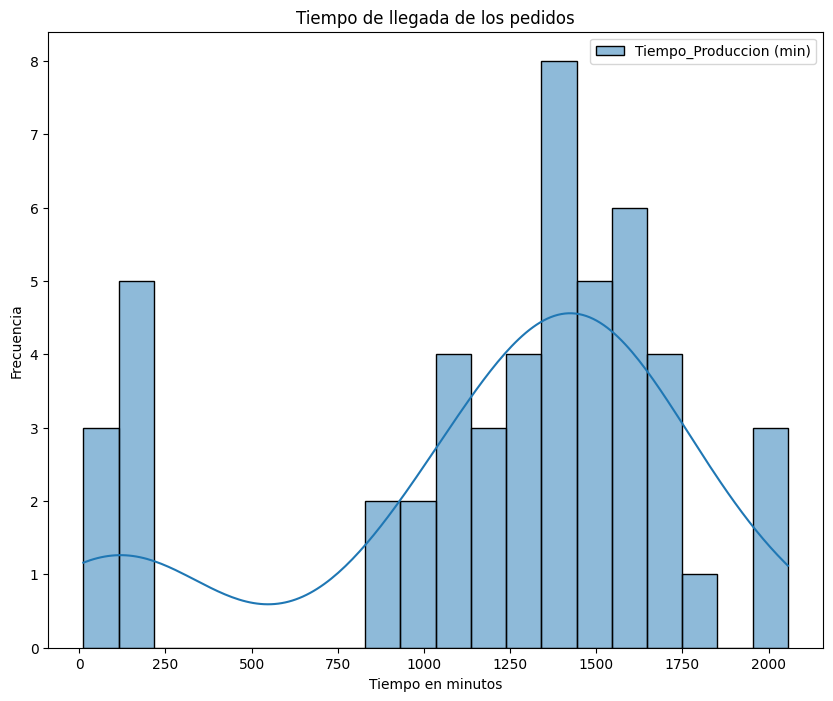

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df1,bins=20,kde=True)
plt.title("Tiempo de llegada de los pedidos")
plt.xlabel("Tiempo en minutos")
plt.ylabel("Frecuencia")
plt.show()

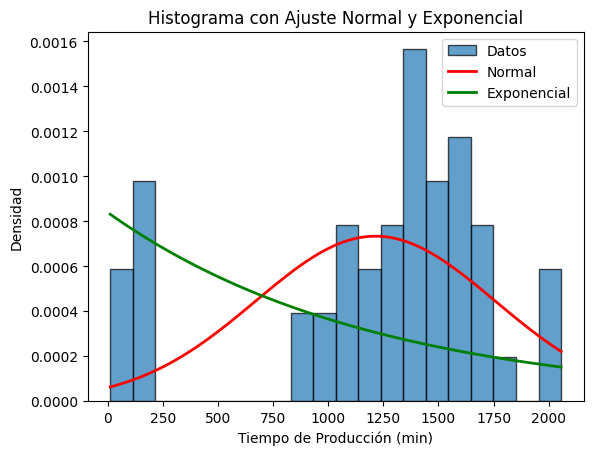

In [ ]:

# Cargar datos : usamos read csv para leer directamente los datos del archivo suministrado por el profesor.
df = pd.read_excel("tiempos_produccion.xlsx")
col = "Tiempo_Produccion (min)"
data = df[col]

# Histograma
plt.hist(data, bins=20, edgecolor="black", density=True, alpha=0.7, label="Datos")

# Ajuste Normal
mu, sigma = stats.norm.fit(data)
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), "r-", lw=2, label="Normal")

# Ajuste Exponencial
loc, scale = stats.expon.fit(data)
plt.plot(x, stats.expon.pdf(x, loc, scale), "g-", lw=2, label="Exponencial")

plt.xlabel("Tiempo de Producción (min)")
plt.ylabel("Densidad")
plt.title("Histograma con Ajuste Normal y Exponencial")
plt.legend()
plt.show()


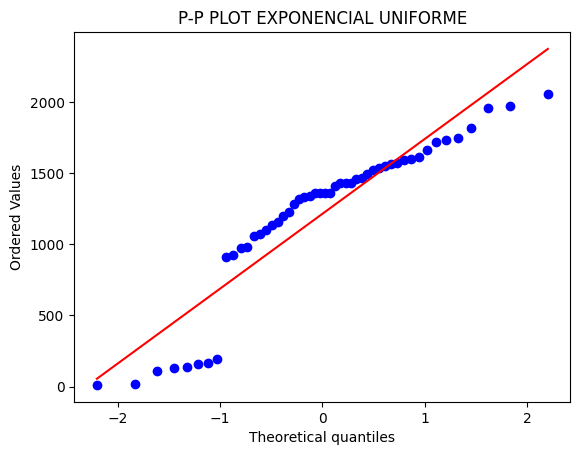

In [ ]:

stats.probplot(data, dist="norm", plot=plt)
plt.title("P-P PLOT EXPONENCIAL UNIFORME")
plt.show()


#**Pruebas de bondad**

In [ ]:
# Leer archivo Excel
ID = pd.read_excel("tiempos_produccion.xlsx")

# Seleccionar la primera columna numérica
columna = ID.select_dtypes(include='number').columns[0]
valores = ID[columna].dropna()

print("\n--- Pruebas de Bondad de Ajuste ---")

# ================= NORMAL =================
mu, sigma = np.mean(valores), np.std(valores, ddof=1)
ks_stat_norm, ks_p_norm = stats.kstest(valores, "norm", args=(mu, sigma))
print(f"Kolmogorov-Smirnov (Normal): Estadístico={ks_stat_norm:.4f}, p-valor={ks_p_norm:.4f}")

if ks_p_norm > 0.05:
    print("No se rechaza H0 → Los datos podrían seguir una Normal.")
else:
    print("Se rechaza H0 → Los datos NO siguen una Normal.")


# ================= EXPONENCIAL (KS) =================
loc, scale = stats.expon.fit(valores, floc=0)  # ajuste de parámetros
ks_stat_exp, ks_p_exp = stats.kstest(valores, "expon", args=(loc, scale))
print(f"\nKolmogorov-Smirnov (Exponencial): Estadístico={ks_stat_exp:.4f}, p-valor={ks_p_exp:.4f}")

if ks_p_exp > 0.05:
    print("No se rechaza H0 → Los datos podrían seguir una Exponencial (según KS).")
else:
    print("Se rechaza H0 → Los datos NO siguen una Exponencial (según KS).")


# ================= EXPONENCIAL (Anderson-Darling) =================
anderson_exp = stats.anderson(valores, dist='expon')
print("\nAnderson-Darling (Exponencial)")
print(f"Estadístico A²={anderson_exp.statistic:.4f}")
print("Valores críticos:", anderson_exp.critical_values)
print("Niveles de significancia:", anderson_exp.significance_level)

cv_5 = anderson_exp.critical_values[list(anderson_exp.significance_level).index(5.0)]
if anderson_exp.statistic < cv_5:
    print("No se rechaza H0 → Los datos podrían seguir una Exponencial (según Anderson-Darling).")
else:
    print("Se rechaza H0 → Los datos NO siguen una Exponencial (según Anderson-Darling).")




--- Pruebas de Bondad de Ajuste ---
Kolmogorov-Smirnov (Normal): Estadístico=0.1763, p-valor=0.0788
No se rechaza H0 → Los datos podrían seguir una Normal.

Kolmogorov-Smirnov (Exponencial): Estadístico=0.3681, p-valor=0.0000
Se rechaza H0 → Los datos NO siguen una Exponencial (según KS).

Anderson-Darling (Exponencial)
Estadístico A²=7.8219
Valores críticos: [0.911 1.065 1.325 1.587 1.934]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Se rechaza H0 → Los datos NO siguen una Exponencial (según Anderson-Darling).


#Análisis de los tiempos de llegada de pedidos

###Se construyó un histograma de los tiempos de llegada de pedidos. La distribución observada no presenta simetría clara; se aprecia un fuerte sesgo hacia la derecha, con varios valores pequeños y algunos tiempos muy altos que generan una cola larga (atipicos).

######Al contrastar con una distribución Normal mediante los gráficos Q-Q y P-P, se observa un ajuste parcial en la zona central, pero con claras desviaciones en los extremos.  Esto indica que la normalidad describe mejor que la exponencial, pero no alcanza a representar adecuadamente toda la estructura de los datos.

###Al compararlos con una distribución Exponencial,esta presenta desviaciones notorias respecto a la diagonal, confirmando que los datos no siguen este patrón.

#**Los tiempos de llegada de pedidos no se ajustan ni a la distribución Normal ni a la Exponencial. Aunque la normal se aproxima más, las evidencias gráficas muestran un desajuste considerable. Por lo tanto, se recomienda explorar distribuciones alternativas de cola larga, como la lognormal o la Weibull, que podrían capturar mejor el comportamiento observado.**

#*Graficas suministrada por codigo*

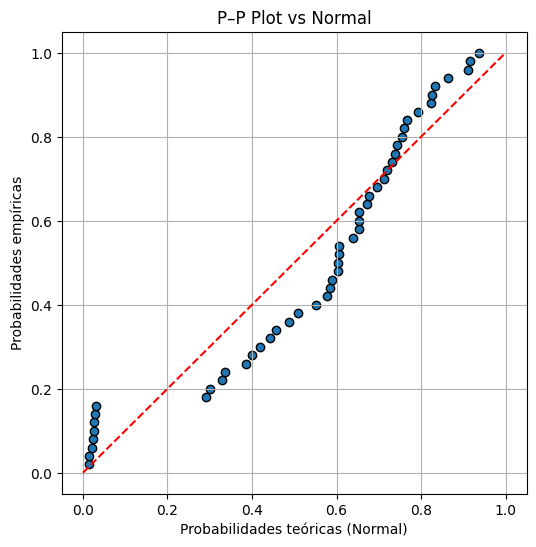

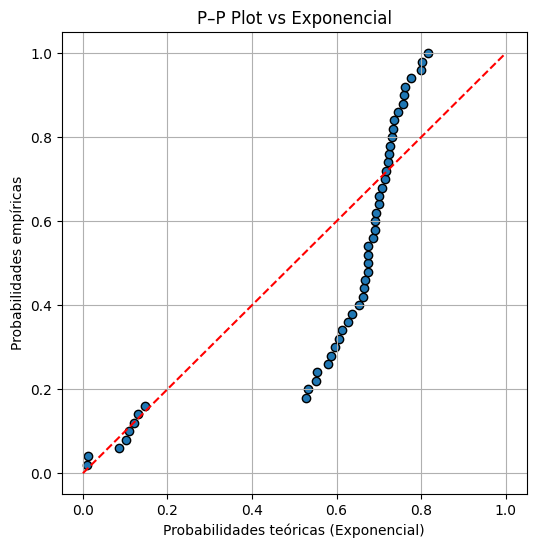

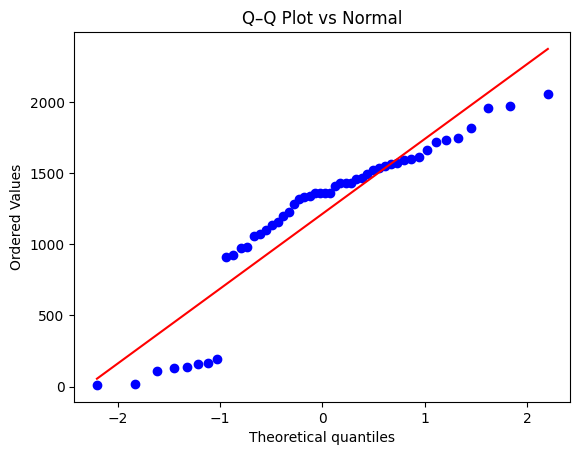

ValueError: x and y must be the same size

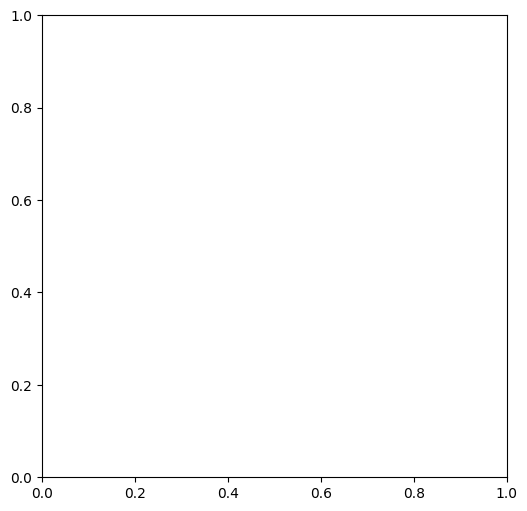

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Cargar el archivo Excel
df = pd.read_excel("tiempos_produccion.xlsx")

# Seleccionar la primera columna numérica
col = df.select_dtypes(include='number').columns[0]
data = df[col].dropna()

# ========================
# P–P PLOTS
# ========================

# P–P Plot Normal
sorted_data = np.sort(data)
empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
mean, std = np.mean(data), np.std(data, ddof=1)
theoretical_cdf_normal = stats.norm.cdf(sorted_data, loc=mean, scale=std)

plt.figure(figsize=(6,6))
plt.scatter(theoretical_cdf_normal, empirical_cdf, edgecolor='k')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("Probabilidades teóricas (Normal)")
plt.ylabel("Probabilidades empíricas")
plt.title("P–P Plot vs Normal")
plt.grid(True)
plt.show()

# P–P Plot Exponencial
loc, scale = stats.expon.fit(data, floc=0)  # Ajustar exponencial
theoretical_cdf_exp = stats.expon.cdf(sorted_data, loc=loc, scale=scale)

plt.figure(figsize=(6,6))
plt.scatter(theoretical_cdf_exp, empirical_cdf, edgecolor='k')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("Probabilidades teóricas (Exponencial)")
plt.ylabel("Probabilidades empíricas")
plt.title("P–P Plot vs Exponencial")
plt.grid(True)
plt.show()

# ========================
# Q–Q PLOTS
# ========================

# Q–Q Plot Normal
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q–Q Plot vs Normal")
plt.show()

# Q–Q Plot Exponencial
osm, osr = stats.probplot(data, dist="expon", fit=True)
plt.figure(figsize=(6,6))
plt.scatter(osm[0], osr, edgecolor='k')
plt.plot([min(osm[0]), max(osm[0])],
         [min(osm[0]), max(osm[0])], 'r--')
plt.xlabel("Cuantiles teóricos (Exponencial)")
plt.ylabel("Cuantiles de los datos")
plt.title("Q–Q Plot vs Exponencial")
plt.grid(True)
plt.show()
